# Differential equations

## 1. Linear model

$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$
birth rate $\lambda>0$, death rate $\mu>0$

In [6]:
import numpy as np
population = lambda t: x0*np.exp((rb-rd)*t)

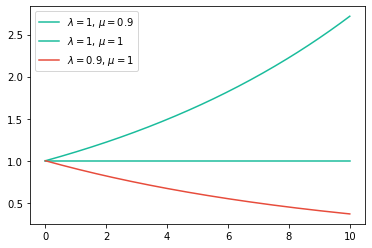

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

f_r, f_b, f_g, f_a = '#e74c3c', '#3498db', '#1abc9c', '#34495e'

t0, t1 = 0, 10

time = np.linspace(t0,t1,200, endpoint=True)

x0, rb, rd = 1, 1, 0.9
legend1 = r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd)
plt.plot(time, population(time), color=f_)
x0, rb, rd = 1, 1, 1
legend2 = r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd)
plt.plot(time, population(time), color=f_)
x0, rb, rd = 1, 0.9, 1
legend3 = r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd)
plt.plot(time, population(time), color=f_r)
plt.legend((legend1, legend2, legend3), loc='upper left')
plt.show()

## 2. Logistic
$$
  \dot x(t) = r\,x(t)\,\left(1-\frac{x(t)}{K}\right)\,,\ x(0)=x_0
$$
solution:
$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$


In [11]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

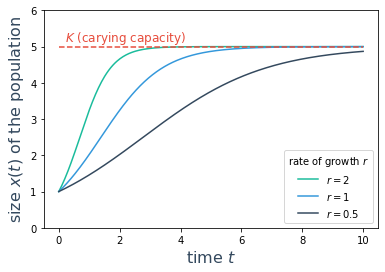

In [15]:
t0, t1 = 0, 10

time = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5

r = 2
legend1 = r'$r=$'+str(r)
plt.plot(time, population(time), color=f_g)
r = 1
legend2 = r'$r=$'+str(r)
plt.plot(time, population(time), color=f_b)

r = 0.5
legend3 = r'$r=$'+str(r)
plt.plot(time, population(time), color=f_a)

plt.ylim([0,K*1.2])
plt.legend((legend1, legend2, legend3), loc='lower right',title=r'rate of growth $r$')
plt.plot([t0, t1], [K, K], color=f_r, linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (carying capacity)", size=12, 
         verticalalignment='bottom', horizontalalignment='left', color=f_r)
plt.xlabel(r'time $t$', fontsize=16, color=f_a)
plt.ylabel(r'size $x(t)$ of the population', fontsize=16, color=f_a)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('1_edo_logistique.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    d = pdf.infodict()
    d['Title'] = '1_python_2_edo_logistic'
    plt.show()

## 3. Lotka-Volterra

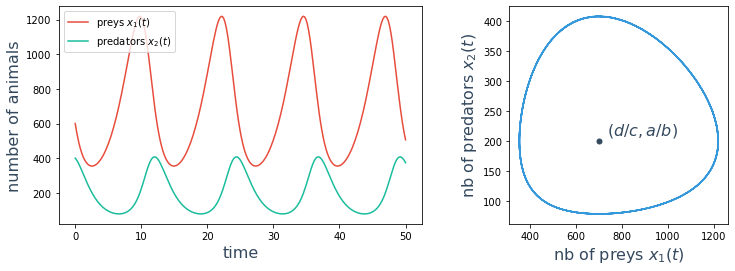

In [16]:
from scipy.integrate import odeint
import matplotlib.gridspec as gridspec

a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = odeint(f, xy0, t)

fig = plt.subplots(1, 2, figsize=(12, 4))

gs = gridspec.GridSpec(1, 2, width_ratios=[8.3, 5], wspace=0.3)

ax0 = plt.subplot(gs[0])
ax0.plot(t, xy_t[:,0], color=f_r, label=r"preys $x_1(t)$")
ax0.plot(t, xy_t[:,1], color=f_g, label=r"predators $x_2(t)$")
ax0.set_xlabel("time", fontsize=16, color=f_a)
ax0.set_ylabel("number of animals", fontsize=16, color=f_a)
ax0.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(xy_t[:,0], xy_t[:,1], color=f_b)
ax1.set_xlabel(r"nb of preys $x_1(t)$", fontsize=16, color=f_a)
ax1.set_ylabel(r"nb of predators $x_2(t)$", fontsize=16, color=f_a)
marker_style = dict(linestyle=':', color=f_a, markersize=10)
ax1.plot([d/c], [a/b], marker='.', **marker_style)
ax1.text(1.05*d/c, 1.05*a/b, r'$(d/c,a/b)$', fontsize=16, color=f_a)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('1_edo_lv.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    d = pdf.infodict()
    d['Title'] = '1_python_2_edo_lv'
    plt.show()

# Misc

[Solve Differential Equations with ODEINT](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) from [Process Dynamics and Control in Python](https://apmonitor.com/pdc/index.php/Main/HomePage) by John D. Hedengren.

$$
     5\,\frac{d y(t)}{dt} = - y(t)+1\,, \quad y(0)=1\,,\quad 0\leq t\leq 40
$$
$u$ steps from 0 to 2 at $t=10$

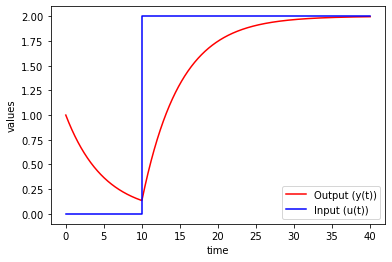

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

$$
\begin{align*}
   2\,\frac{d x(t)}{dt} &= - x(t)+u(t)\,, & x(0)=0
   \\
   5\,\frac{d y(t)}{dt} &= - y(t)+x(t)\,, & y(0)=0
   \\
   u(t) &= 2\,S(t-5)
\end{align*}
$$
for $0\leq t\leq 40$, where $S(t)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time,  $t=5$.

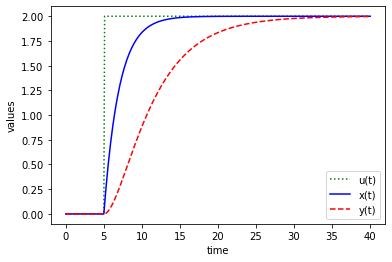

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()